# Compare SCF/SWE relationships to observations

## Observation
**Global EASE-Grid 8-day Blended SSM/I and MODIS Snow Cover, Version 1** (https://nsidc.org/data/NSIDC-0321/versions/1)

See more:
- https://github.com/mickaellalande/PhD/blob/master/Observations/NSIDC/nsidc0321_blended_ssmi_modis/scf_swe.ipynb
- https://github.com/mickaellalande/PhD/blob/master/Observations/NSIDC/nsidc0321_blended_ssmi_modis/nsidc0321_blended_ssmi_modis.ipynb

Mountainous areas with large topographic variability return **low mean SWE values**. Brightness temperatures in these areas may include mixed emission from deep snow on north-facing slopes, snow-free south-facing slopes, wind-scoured Alpine areas, etc.

## Snow Water Equivalent (SWE), snow density ($\rho_{snow}$), snow depth (d) relationship
$$
SWE 
= 
d \cdot \frac{
    \rho_{\text{snow}}
}{
    \rho_{\text{water}}
} \ [\text{m}] 
\simeq 
d \cdot \rho_{\text{snow}} \ [\text{mm or kg} \cdot \text{m}^{-2}]
$$

$$
\rho_{\text{water}} 
= 
997 \ \text{kg} \cdot \text{m}^{-3} 
\simeq 
1000 \ \text{kg} \cdot \text{m}^{-3}
$$

## Parameterizations

- [Niu and Yang (2007)](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/2007JD008674): https://github.com/mickaellalande/PhD/blob/master/local/SCE_SWE_parametization/Niu2007.ipynb


$$
SCF 
= 
\tanh \frac{
    d
}{
    2.5 \cdot z_{0g} \cdot 
    \left(
        \frac{ \rho_{\text{snow}} }{ \rho_{\text{new}}} 
    \right)^{m}
}
=
\tanh \frac{
    50 \cdot d
}{
    0.025 \cdot \rho_{\text{snow}}
} \ (\text{in Orchidée}) 
= 
\tanh \frac{
    SWE
}{
    2.5 \cdot z_{0g} \cdot \rho_{\text{snow}} \cdot 
    \left(
        \frac{ \rho_{\text{snow}} }{ \rho_{\text{new}}}
    \right)^{m}
}
$$

> - **In Orchidée for $frac_{\text{snow,veg}}$** (https://orchidas.lsce.ipsl.fr/dev/albedo/):    
>  - $z_{0g} = 0.01$ (ground roughness length)  
>  - $\rho_{\text{new}} = 50 \text{ kg} \cdot \text{m}^{-3}$ (density of the new snow, 100 in NY07)  
>  - $m = 1$ (empirical constant)
>
> - **Orchidée snow scheme**: [Wang et al. (2013)](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/jgrd.50395)

![](https://agupubs.onlinelibrary.wiley.com/cms/asset/9d1b86a4-f80b-467f-b660-ead9b7f3f6ba/jgrd13940-fig-0002.png)

- [Niu and Yang (2007)](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/2007JD008674) modified ([LMDZOR-STD-NY07-CUSTOM-200](https://github.com/mickaellalande/PhD/blob/master/Jean-Zay/SCA_parameterization/LMDZOR-STD-NY07-CUSTOM-200/NY07-CUSTOM-200_REF.ipynb)): https://github.com/mickaellalande/PhD/blob/master/local/SCE_SWE_parametization/Niu2007-std.ipynb

$$
SCF 
= 
\tanh \frac{
    50 \cdot d
}{
    0.025 \cdot \rho_{\text{snow}} \cdot
    \left(
        1 + \frac{ \sigma_{topo} }{ 200 }
    \right)
}
= 
\tanh \frac{
    SWE
}{
    2.5 \cdot z_{0g} \cdot \rho_{\text{snow}} \cdot 
    \left(
        \frac{ \rho_{\text{snow}} }{ \rho_{\text{new}} } 
    \right)^{m} \cdot
    \left(
        1 + \frac{ \sigma_{topo} }{ 200 }
    \right)
} 
$$

- [Swenson and Lawrence (2012)](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2012JD018178) simplified (only depletion curve): https://github.com/mickaellalande/PhD/blob/master/local/SCE_SWE_parametization/Swenson2012.ipynb

 - Accumulation Events

   N is an accumulation event
   
   $$
   SCF_{N+1} = 1 - (1 - s_{N+1})(1-SCF_N)
   $$
   
   where $$ s = min(1, k \cdot SWE) $$ (k is a scale factor set to 0.1)
   
   ![](https://agupubs.onlinelibrary.wiley.com/cms/asset/9d260383-415c-41e1-8803-88666f91d937/jgrd18192-fig-0007.png)

 - Depletion Curve
 
    $$
    SCF
    =
    1 - \left[
      \frac{1}{\pi} \cdot \operatorname{acos} \left(
        2 \cdot \frac{ SWE }{ SWE_{\max } } - 1
      \right)
    \right]^{N_{\text{melt}}}
    $$

    $$
    N_{\text{melt}} = \frac{ 200 }{ \sigma_{\text{topo}} }
    $$
    
    $$
    SWE_{\text{max}}
    =
    SWE \cdot \left[
      \frac{
        \cos \left( \pi \cdot (1 - SCF) \right) + 1
      }{
        2
      }
    \right]^{
        - \frac{ 1 }{ N_{\text{melt}} } 
    } \ \text{(evaluated after the accumlulation event)}
    $$
    
    Sacré doute par rapport à leur formule... de mon côté j'obtiens :
    
    $$ 
    SWE_{\text{max}}
    =
    \frac{
        2 \cdot SWE 
    }{
        1 + \cos \left[ 
            \pi \cdot \left( 1 - SCF \right)^{
                \frac{ 1 }{ N_{\text{melt}} }
            } 
        \right]
    }
    $$
   
   ![](https://agupubs.onlinelibrary.wiley.com/cms/asset/350ead8d-acce-4457-9b45-768f40cd9b4e/jgrd18192-fig-0009.png)

- [Roesch et al. (2001)](https://link.springer.com/article/10.1007%2Fs003820100153) simplified (only moutaineous area without forest): https://github.com/mickaellalande/PhD/blob/master/local/SCE_SWE_parametization/Roesch2001.ipynb

$$
f_{s}=0.95 \cdot \tanh \left(100 \cdot S_{n}\right) \sqrt{\frac{1000 \cdot S_{n}}{1000 \cdot S_{n}+\epsilon+0.15 \sigma_{z}}}
$$


## Data access on CICLAD
Path on CICLAD: `/data/mlalande/NSIDC/nsidc0321_blended_ssmi_modis/`

## Python environment
conda env: new `phd_v3` (in `envs/phd`)

# Import modules

In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
# sys.path.insert(1, '/home/mlalande/notebooks/utils') # to include my util file in previous directory
sys.path.insert(1, '/home/lalandmi/Dropbox/Thèse/notebooks/utils') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
# u.check_virtual_memory()

3.8.5 | packaged by conda-forge | (default, Jul 24 2020, 01:25:15) 
[GCC 7.5.0]


In [2]:
xr.__version__

'0.16.0'

# Define paths

In [3]:
# CICLAD
# path = '/data/mlalande/NSIDC/nsidc0321_blended_ssmi_modis/'

# Local
path = '/home/lalandmi/data/nsidc0321_blended_ssmi_modis/'

# Get data

In [4]:
ds = xr.open_mfdataset(path+'/north/NL.*.nsidc0321v01.nc', combine='by_coords')

In [5]:
# ds

In [6]:
scf_with_mask = ds.SCA
swe_with_mask = ds.SWE

In [7]:
# scf_with_mask
# swe_with_mask

### SCF
 0          : no snow  
 1 to 100   : percent MODIS snow-covered area  
 -175       : no SCA, due to to cloud/fill/night  
 -200       : fixed value for corners  
 -250       : ocean  
 -300       : permanent ice sheets and large glaciers

### SWE
 \> 0       : SWE from deep microwave algorithm for 8-day period  
 0          : no snow  
 -100 to -1 : -1 * SWE from shallow microwave algorithm  
 -150       : missing microwave brightness temperatures  
 -200       : fixed value for corners  
 -250       : ocean  
 -300       : permanent ice sheets and large glaciers  
 -350       : no microwave SWE, but visible SCA > 25%

In [8]:
scf = scf_with_mask.where( (scf_with_mask >= 0) & (scf_with_mask <= 100) )

swe = swe_with_mask.where(swe_with_mask >= 0)
swe_from_mw_algo = -1 * swe_with_mask.where( (swe_with_mask >= -100) & (swe_with_mask <= -1) )

## Get std of topography at 25 km
http://www.temis.nl/data/gmted2010/

In [9]:
gmted = xr.open_dataset('/home/lalandmi/data/GMTED2010/GMTED2010_15n060_0250deg.nc')

In [10]:
std = gmted \
    .assign_coords({'nlat': gmted.latitude, 'nlon': gmted.longitude}) \
    .rename({'nlat': 'lat', 'nlon': 'lon'}) \
    .elevation_stddev

# Regrid on topo

In [11]:
scf_regrid = u.regrid(scf.rename({'longitude': 'lon', 'latitude': 'lat'}), std, 
                      globe=False, periodic=False)

Reuse existing file: bilinear_721x721_720x1440.nc


/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [12]:
swe_regrid = u.regrid(swe.rename({'longitude': 'lon', 'latitude': 'lat'}), std, 
                      globe=False, periodic=False)

Reuse existing file: bilinear_721x721_720x1440.nc


/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


# Load data (/!\ 6Go /!\\)
Otherwise ignore this cell but it will be longer to make plots

In [13]:
swe_regrid.load()
scf_regrid.load()

<xarray.DataArray 'SCA' (time: 355, lat: 720, lon: 1440)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) datetime64[ns] 2000-03-05 2000-03-13 ... 2008-01-17
  * lon      (lon) float32 -179.875 -179.625 -179.375 ... 179.625 179.875
  * lat      (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
Attributes:
    regrid_method:        bilinear
    standard_name:        surface_snow_area_fraction
    grid_mapping:         projection
    ancillary_variables:  scaInfo
    flag_meanings:        \nno_SCA_due_to_cloud_fill_night \ngrid_corners \no...
    flag_values:          [-175 -200 -250 -300]
    information:          \n 0          : no snow\n 1 to 100   : percent MODI...
    units:                %
    long_name:            MODIS snow-covered area (SCA)

# Plot SCF/SWE relationship
Reproduce Figure 2 of Niu and Yang (2007) with monthly values

![](https://agupubs.onlinelibrary.wiley.com/cms/asset/9d1b86a4-f80b-467f-b660-ead9b7f3f6ba/jgrd13940-fig-0002.png)

In [ ]:
1 - ( 1 / np.pi * np.arccos( 2 * SWE / SWE_max - 1 ) )**N_melt

NY07
NY07_STD
SL12


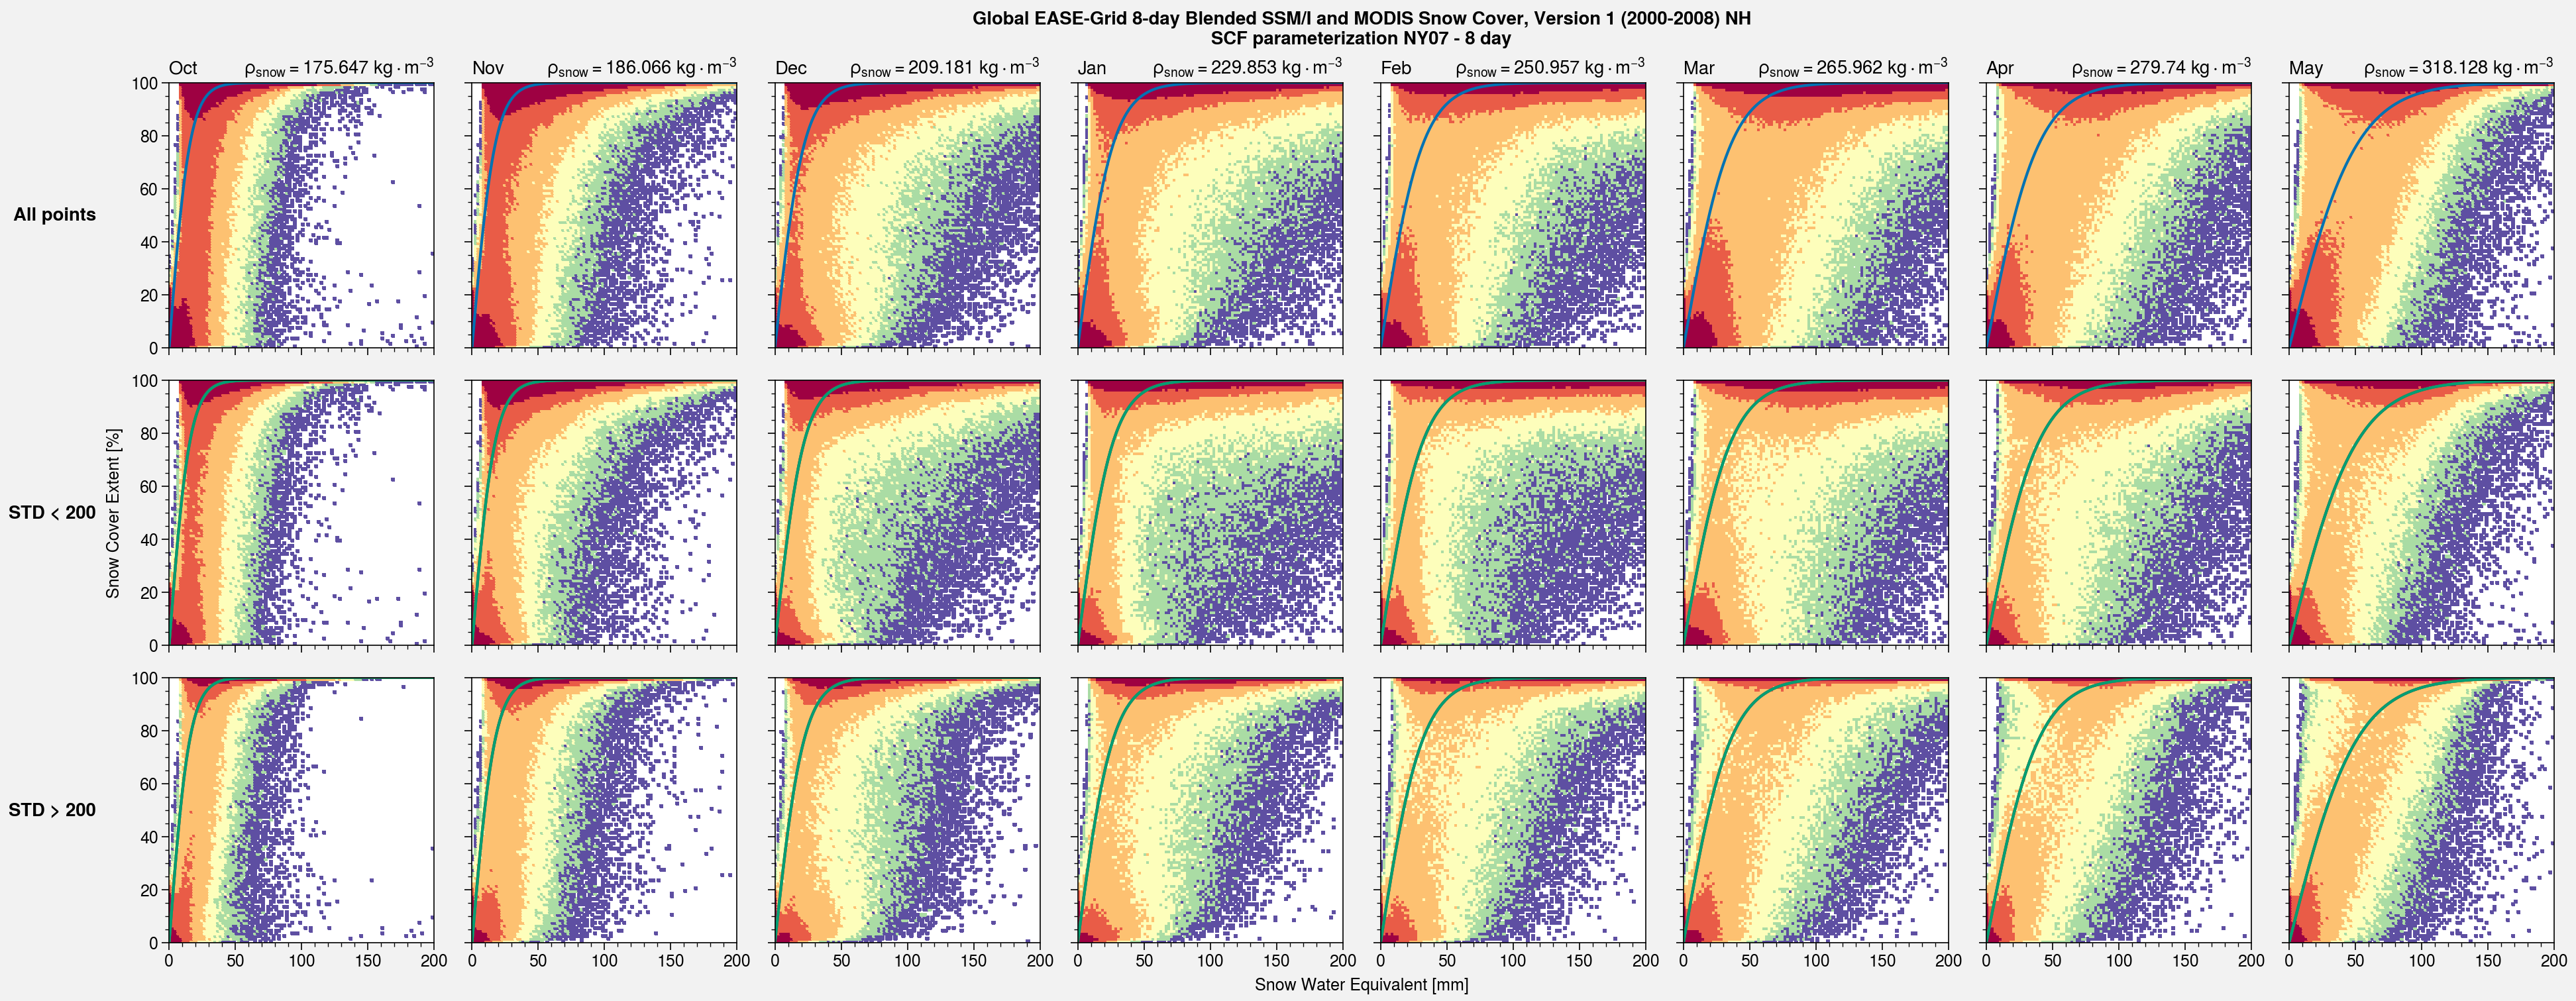

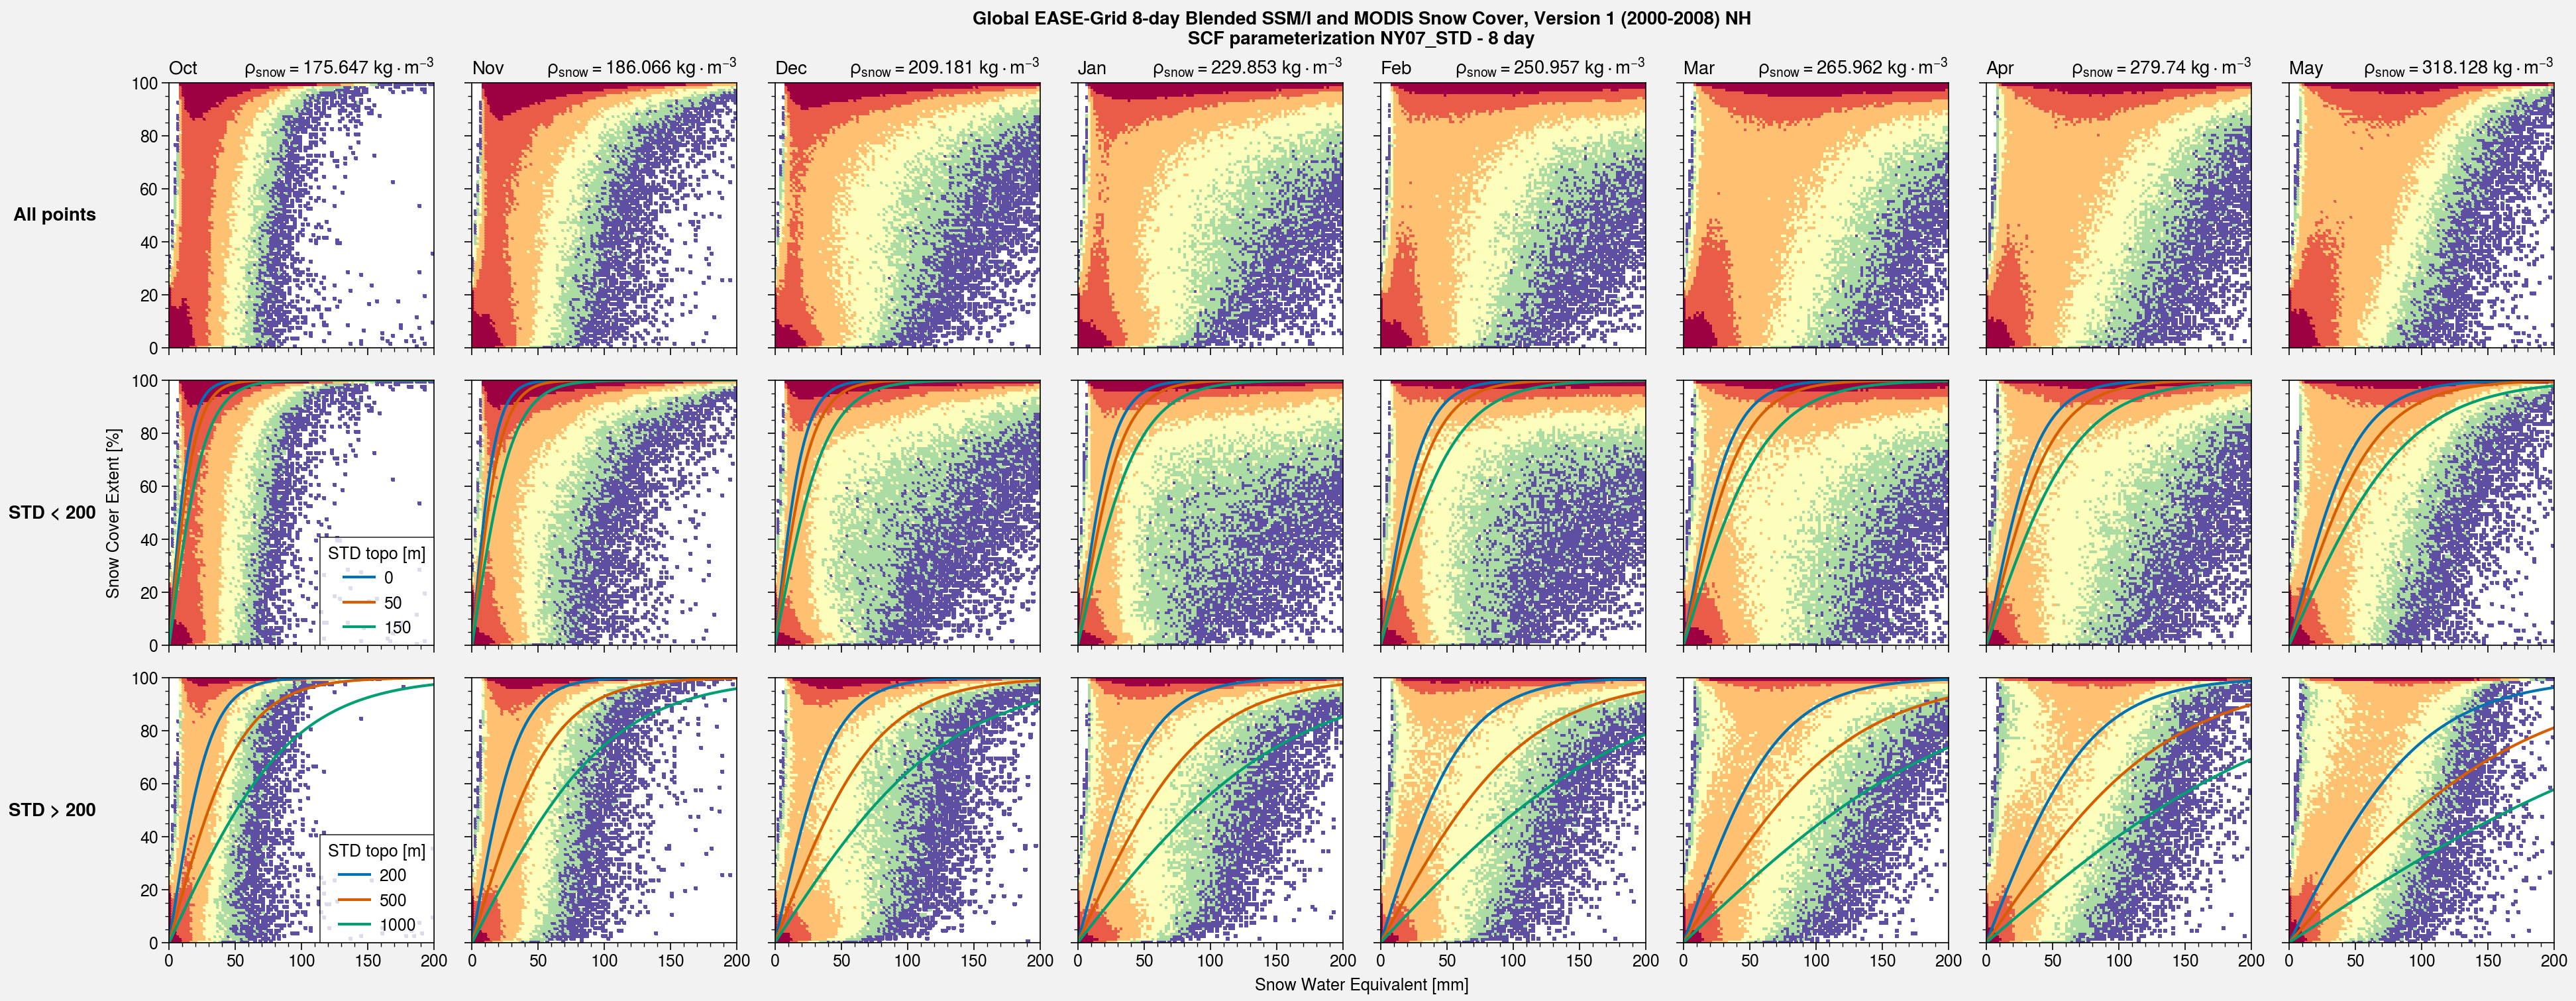

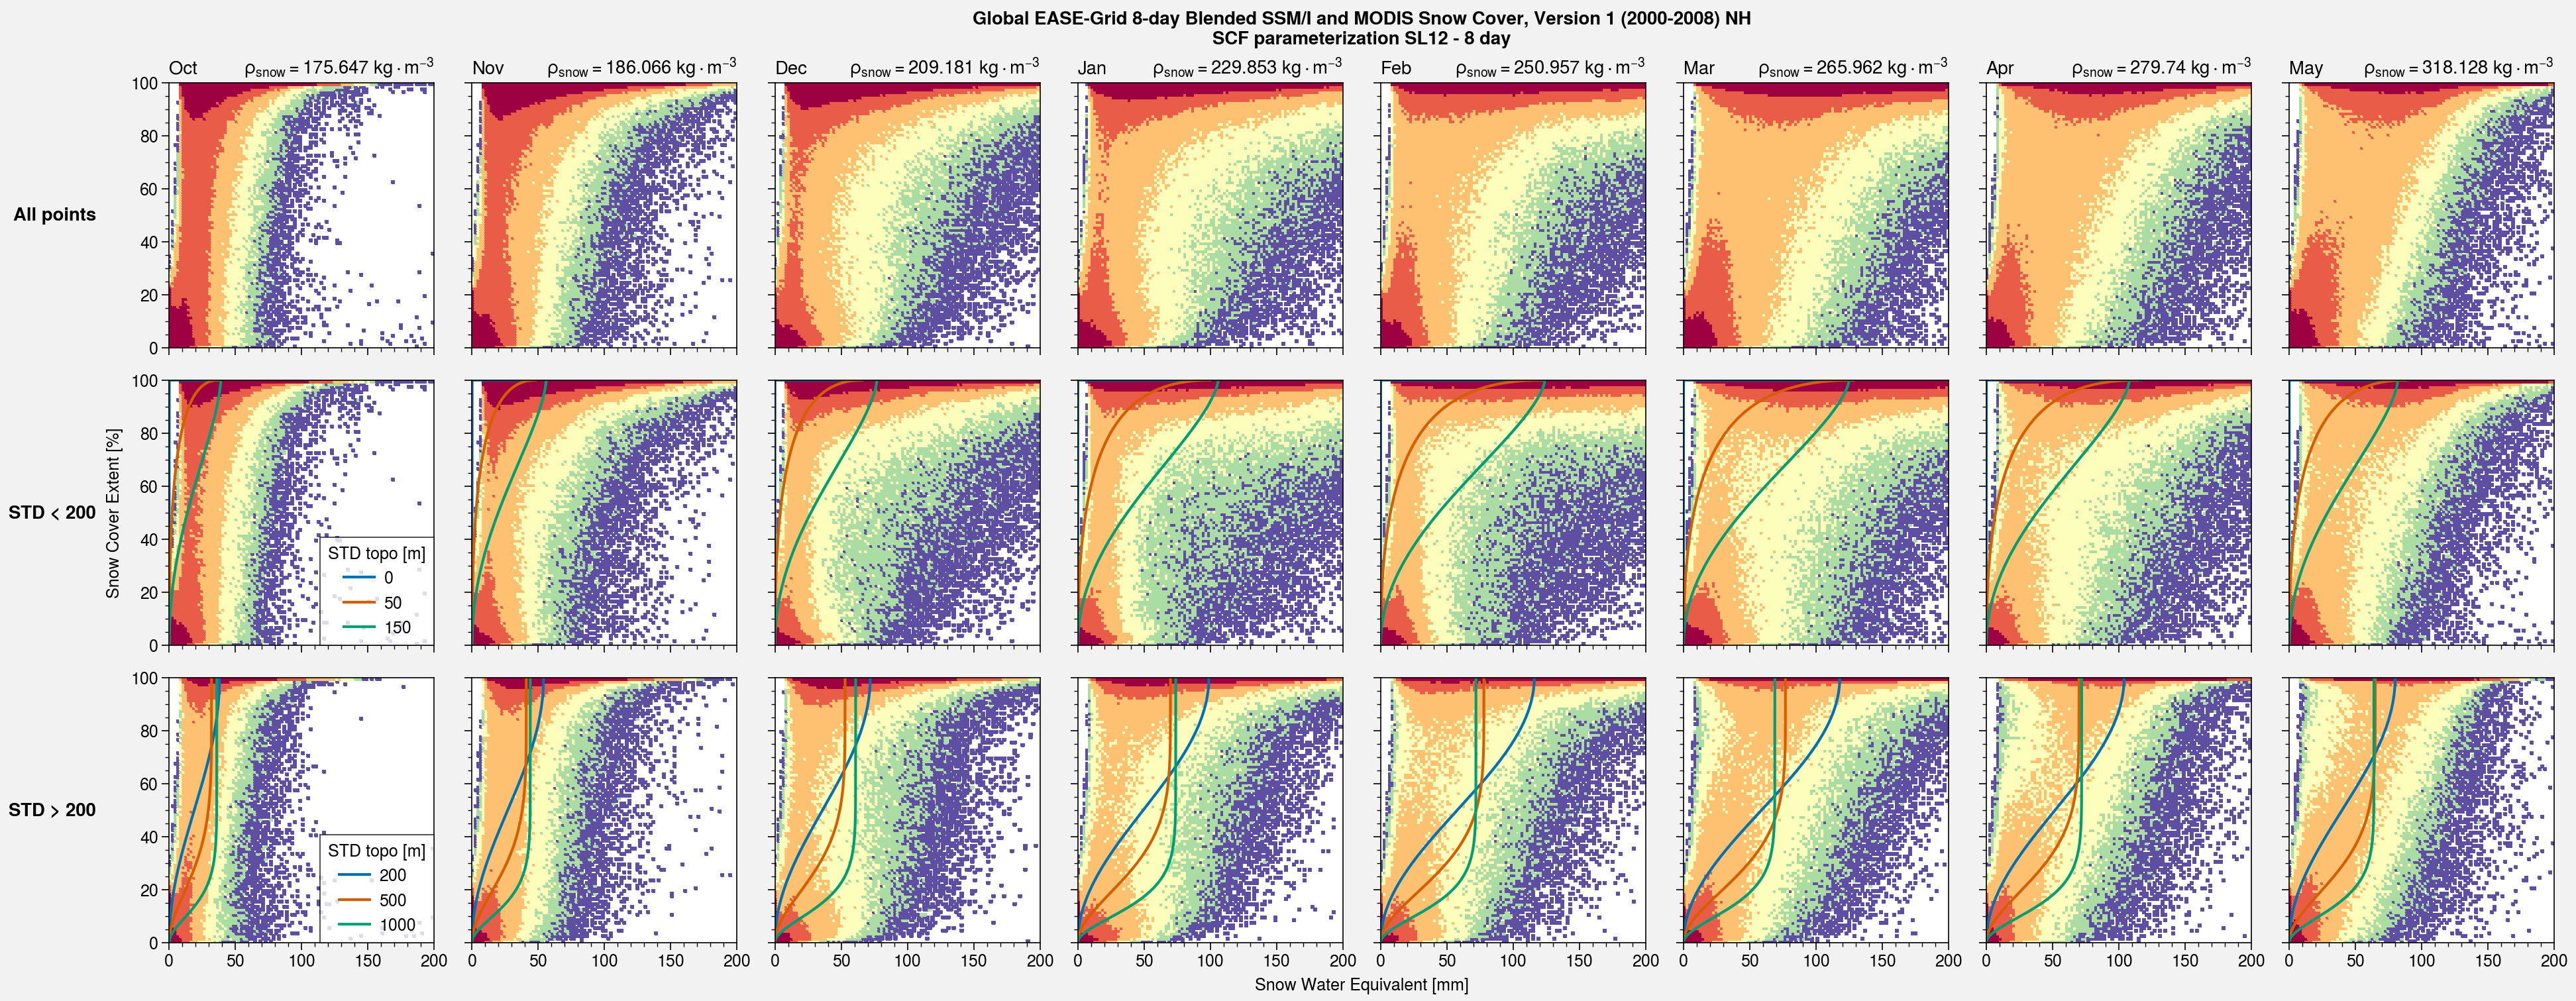

In [112]:
import calendar
months = np.array([10, 11, 12, 1, 2, 3, 4, 5])
monthly_rho_snow = np.array([
    175.647, 186.066, 209.181, 229.853,
    250.957, 265.962, 279.74, 318.128
])
lim_std = 200
SWE_max = 200

xylim = [[0, SWE_max], [0, 100]]
bins = 100
cmap = 'Spectral_r'
norm = 'log'
vmin=1
cmin=1

SWE = plot.arange(0, SWE_max, 1)
rho_snow_list = plot.arange(100, 400, 100)

for param in ['NY07', 'NY07_STD', 'SL12']:
# for param in ['SL12']:
    print(param)

    for domain in ['NH']:
        latlim, lonlim = u.get_zone(domain)

        # Figure
        fig, axs = plot.subplots(nrows=3, ncols=months.size, axwidth=2)
        
        k = 0
        
        # All points
        for i, month in enumerate(months):
            axs[k].hist2d(
                swe_regrid.sel(lat=latlim, lon=lonlim).where(swe_regrid['time.month'] == month, drop=True).values.flatten(), 
                scf_regrid.sel(lat=latlim, lon=lonlim).where(scf_regrid['time.month'] == month, drop=True).values.flatten(), 
                bins=bins, range=xylim, cmap=cmap, norm=norm, vmin=vmin, cmin=cmin
            )
    
            if param in ['NY07']:
                x = SWE
                y = u.scf(param=param, SWE=SWE, rho_snow=monthly_rho_snow[i])
                axs[k].plot(x, y)

            axs[k].format(
                ltitle=calendar.month_abbr[month],
                rtitle=r'$\rho_{snow} = $' + str(monthly_rho_snow[i]) + ' $kg \cdot m^{-3}$'
            )

            k += 1
        
        # STD > and < to 200
        for cond, sigma_topo_list in zip(
            [(std < lim_std), (std > lim_std)],
            [[0, 50, 150], [200, 500, 1000]]
        ):
            for i, month in enumerate(months):
#                 print(calendar.month_name[month])
                axs[k].hist2d(
                    swe_regrid.sel(lat=latlim, lon=lonlim).where(
                        (swe_regrid['time.month'] == month) & cond, drop=True).values.flatten(), 
                    scf_regrid.sel(lat=latlim, lon=lonlim).where(
                        (scf_regrid['time.month'] == month) & cond, drop=True).values.flatten(), 
                    bins=bins, range=xylim, cmap=cmap, norm=norm, vmin=vmin, cmin=cmin
                )

                hs = []
                for sigma_topo in sigma_topo_list:
                    x = SWE
                    if param in ['NY07_STD']:
                        y = u.scf(param=param, SWE=SWE, rho_snow=monthly_rho_snow[i], sigma_topo=sigma_topo)
                    elif param in ['SL12']:
                        # Compute the mean SWE to show in average where the curve starts from around sigma_topo
                        SWE_mean = int(swe_regrid.sel(lat=latlim, lon=lonlim).where(
                            (swe_regrid['time.month'] == month) & 
                            (std > sigma_topo-50) & (std < sigma_topo+50) & 
                            (scf_regrid > 50), 
                            drop=True
                        ).mean().values)
                        x = plot.arange(0, SWE_mean, 0.1)
                        y = u.scf(param=param, SWE=x, sigma_topo=sigma_topo, SWE_max=SWE_mean)
                    else:
                        y = u.scf(param=param, SWE=SWE, rho_snow=monthly_rho_snow[i])
                    h = axs[k].plot(x, y, label=sigma_topo)
                    hs.append(h)
                if (i == 0) & (param not in ['NY07']): axs[k].legend(hs, label='STD topo [m]', ncols=1, loc='lr')
                k += 1        
        
        axs.format(
            rowlabels=['All points', 'STD < '+str(lim_std), 'STD > '+str(lim_std)],
            xlabel='Snow Water Equivalent [mm]',
            ylabel='Snow Cover Extent [%]',
            suptitle='Global EASE-Grid 8-day Blended SSM/I and MODIS Snow Cover, Version 1 ' \
                     '('+str(ds.time['time.year'][0].values)+'-'+str(ds.time['time.year'][-1].values)+') ' + domain + '\n' \
                     'SCF parameterization '+param+' - 8 day'
        )

        filename = 'EASE-Grid_SCF-SWE_Oct-May_'+domain+'_'+param
        for ext in ['jpg', 'png', 'pdf']:
            fig.save('img/'+filename+'.'+ext)

# Swenson and Lawrence (2012)
Only depletion curve + relative SWE

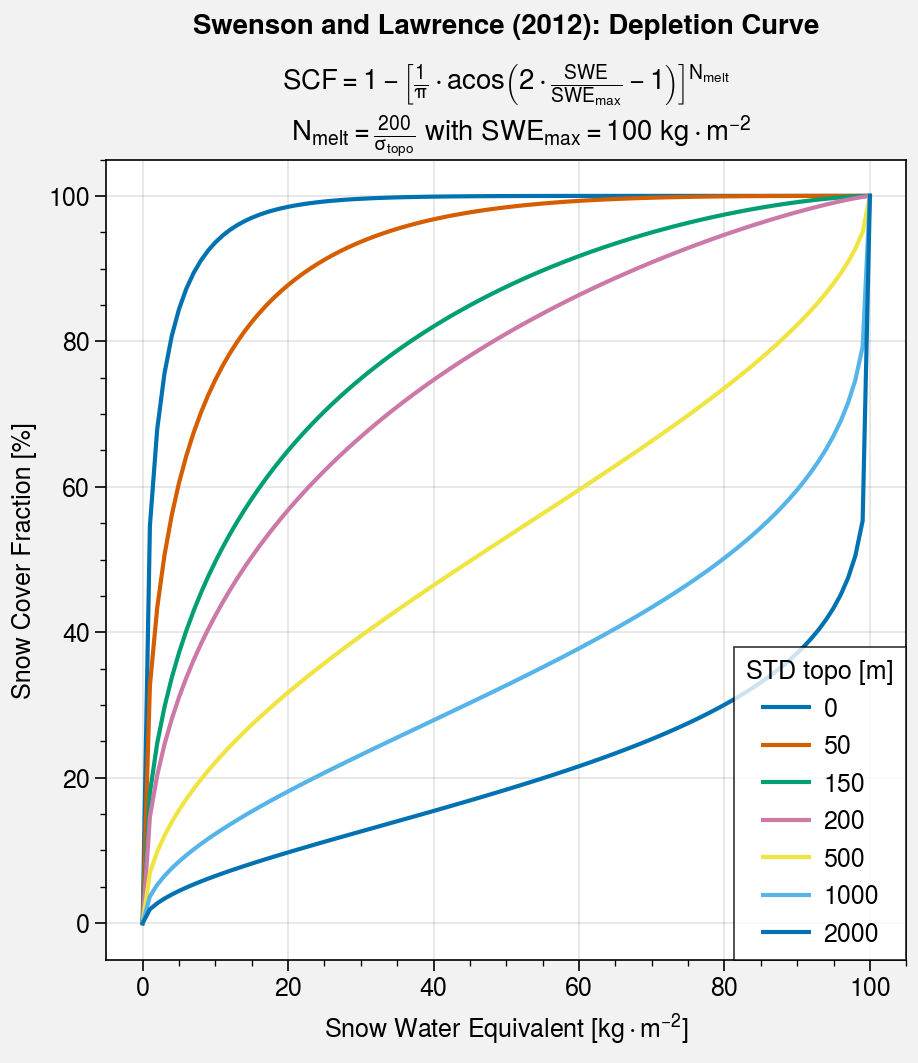

In [2]:
fig, axs = plot.subplots(nrows=1, ncols=1, axwidth=4)

SWE_max = 100
# epsilon = 1e-6
# N_melt = 200 / (sigma_topo + epsilon)

# swe_max = ( 2. * 100 ) / ( 1. + np.cos( np.pi * (1. - 1)**(1./N_melt(:)) ) + eps ) 

SWE = plot.arange(0, SWE_max, 1)
param = 'SL12'

k=0
hs = []
for sigma_topo in [0, 50, 150, 200, 500, 1000, 2000]:
    x = SWE
    y = u.scf(param=param, SWE=SWE, sigma_topo=sigma_topo, SWE_max=SWE_max)
    h = axs[k].plot(x, y, label=sigma_topo)
    hs.append(h)
axs[k].legend(hs, label='STD topo [m]', ncols=1, loc='lr')
axs.format(
    suptitle='Swenson and Lawrence (2012): Depletion Curve',
    title=
    r'''$ SCF = 1 - \left[\frac{1}{\pi} \cdot \operatorname{acos} \left(2 \cdot \frac{SWE}{SWE_{\max }} - 1\right)\right]^{N_{melt}}$
    $ N_{melt} = \frac{200}{\sigma_{topo}}$ with $SWE_{max} = $''' + str(SWE_max) + ' $kg \cdot m^{-2}$',
    xlabel='Snow Water Equivalent [$kg \cdot m^{-2}$]',
    ylabel='Snow Cover Fraction [%]'
)

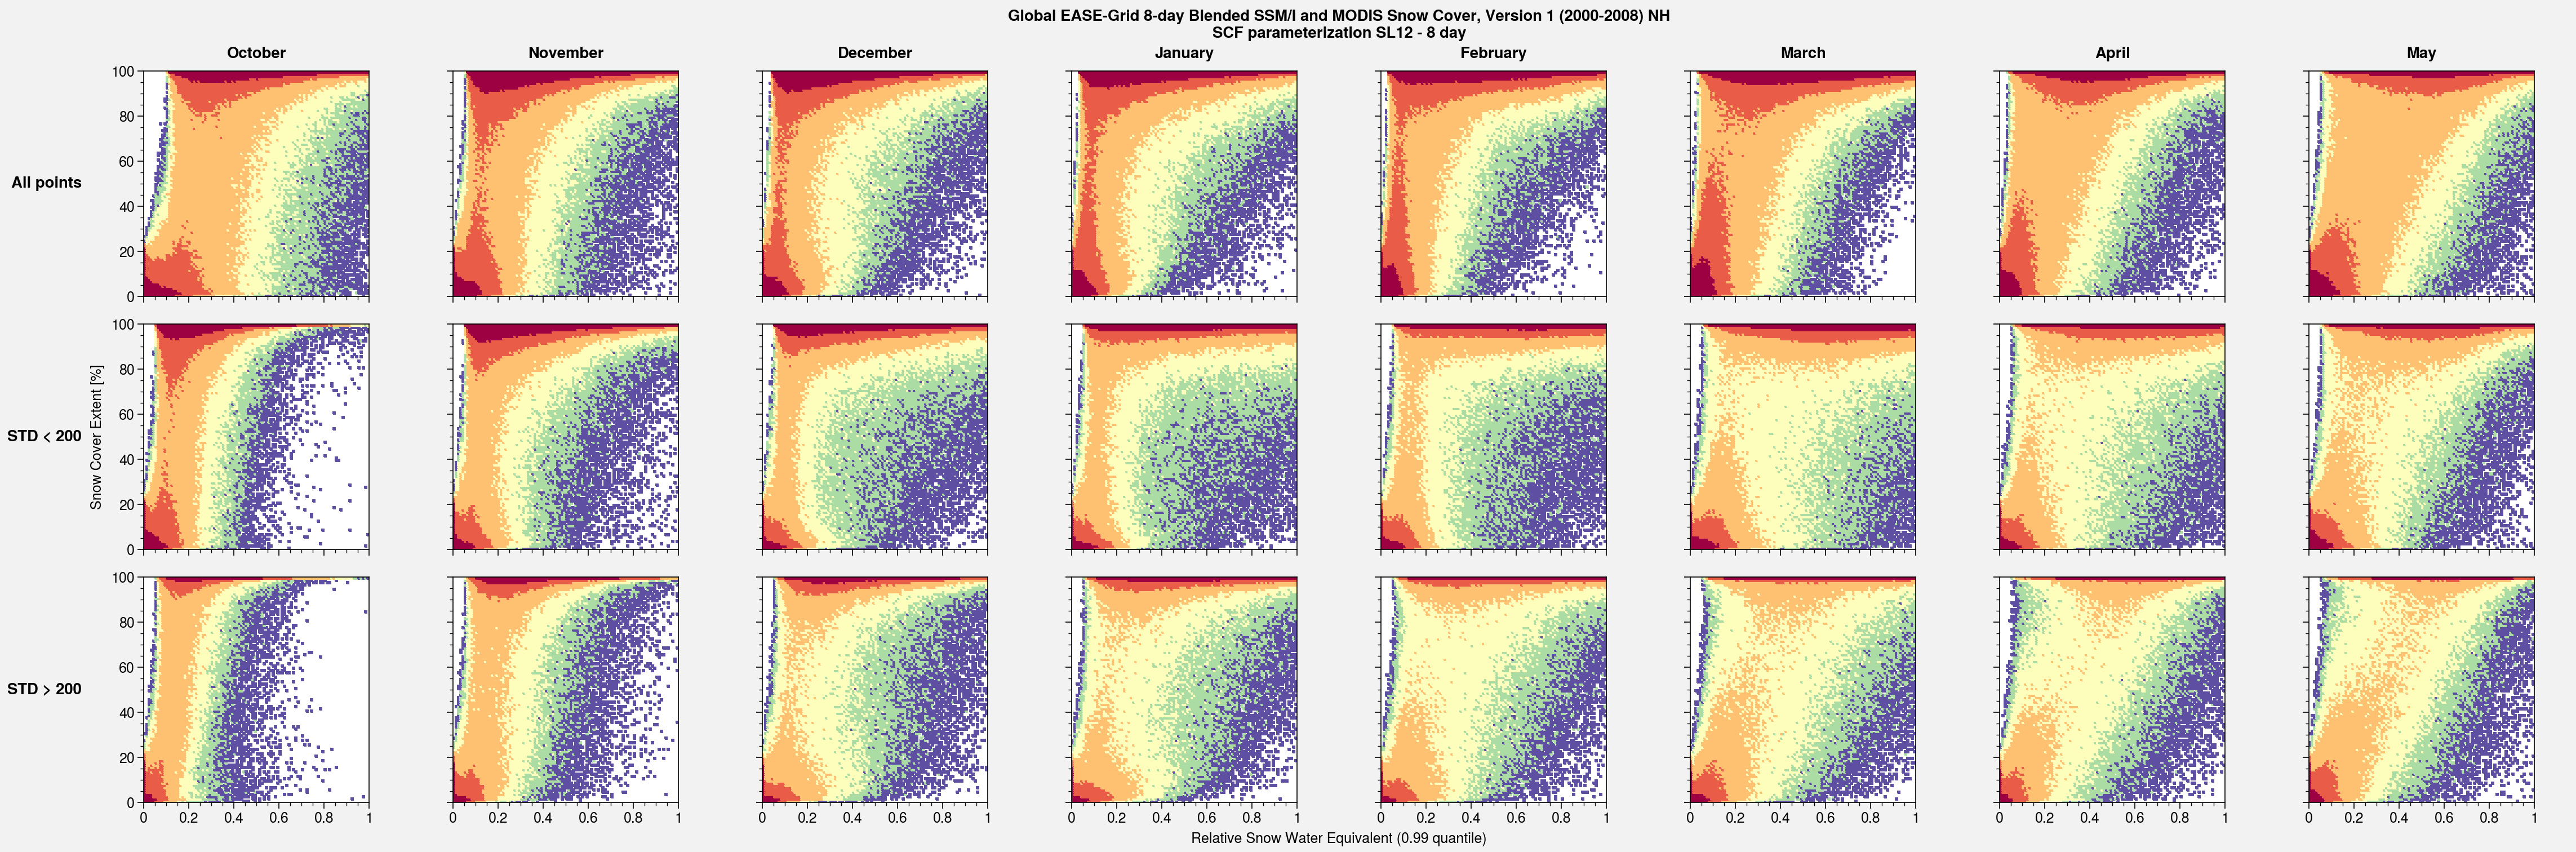

In [120]:
import calendar
months = np.array([10, 11, 12, 1, 2, 3, 4, 5])

lim_std = 200
SWE_max = 1 # relative

xylim = [[0, SWE_max], [0, 100]]
bins = 100
cmap = 'Spectral_r'
norm = 'log'
vmin=1
cmin=1

SWE = plot.arange(0, SWE_max, 0.01)

# for domain in ['NH', 'NA', 'HMA']:
for domain in ['NH']:
    latlim, lonlim = u.get_zone(domain)

    # Figure
    fig, axs = plot.subplots(nrows=3, ncols=months.size, axwidth=2)

    k = 0

    # All points
    for i, month in enumerate(months):
        swe_raw = swe_regrid.sel(lat=latlim, lon=lonlim).where(swe_regrid['time.month'] == month, drop=True)
        swe_max = swe_raw.quantile(0.99)
        
        swe_relative = swe_raw / swe_max
        
        axs[k].hist2d(
            swe_relative.values.flatten(), 
            scf_regrid.sel(lat=latlim, lon=lonlim).where(scf_regrid['time.month'] == month, drop=True).values.flatten(), 
            bins=bins, range=xylim, cmap=cmap, norm=norm, vmin=vmin, cmin=cmin
        )
        k += 1
        
    # STD < 200
    for i, month in enumerate(months):
        swe_raw = swe_regrid.sel(lat=latlim, lon=lonlim).where((swe_regrid['time.month'] == month) & (std < lim_std), drop=True)
        swe_relative = swe_raw / swe_max
        
        axs[k].hist2d(
            swe_relative.values.flatten(), 
            scf_regrid.sel(lat=latlim, lon=lonlim).where((scf_regrid['time.month'] == month) & (std < lim_std), drop=True).values.flatten(), 
            bins=bins, range=xylim, cmap=cmap, norm=norm, vmin=vmin, cmin=cmin
        )
        k += 1
    # STD > 200
    for i, month in enumerate(months):
        swe_raw = swe_regrid.sel(lat=latlim, lon=lonlim).where((swe_regrid['time.month'] == month) & (std > lim_std), drop=True)
        swe_relative = swe_raw / swe_max
        
        axs[k].hist2d(
            swe_relative.values.flatten(), 
            scf_regrid.sel(lat=latlim, lon=lonlim).where((scf_regrid['time.month'] == month) & (std > lim_std), drop=True).values.flatten(), 
            bins=bins, range=xylim, cmap=cmap, norm=norm, vmin=vmin, cmin=cmin
        )
        k += 1

    axs.format(
        collabels=[calendar.month_name[month] for month in months],
        rowlabels=['All points', 'STD < '+str(lim_std), 'STD > '+str(lim_std)],
        xlabel='Relative Snow Water Equivalent (0.99 quantile)',
        ylabel='Snow Cover Extent [%]',
        suptitle='Global EASE-Grid 8-day Blended SSM/I and MODIS Snow Cover, Version 1 ' \
                 '('+str(ds.time['time.year'][0].values)+'-'+str(ds.time['time.year'][-1].values)+') ' + domain + '\n' \
                 'SCF parameterization '+param+' - 8 day'
    )


#     filename = 'EASE-Grid_SCF-SWE_relative_Oct-May_'+domain
#     for ext in ['jpg', 'png', 'pdf']:
#         fig.save('img/'+filename+'.'+ext)

/home/lalandmi/Dropbox/Thèse/notebooks/utils/param_SCF.py:90: RuntimeWarning: invalid value encountered in arccos
  scf = 1 - ( 1 / np.pi * np.arccos( 2 * SWE / SWE_max - 1 ) )**N_melt
/home/lalandmi/Dropbox/Thèse/notebooks/utils/param_SCF.py:90: RuntimeWarning: invalid value encountered in arccos
  scf = 1 - ( 1 / np.pi * np.arccos( 2 * SWE / SWE_max - 1 ) )**N_melt
/home/lalandmi/Dropbox/Thèse/notebooks/utils/param_SCF.py:90: RuntimeWarning: invalid value encountered in arccos
  scf = 1 - ( 1 / np.pi * np.arccos( 2 * SWE / SWE_max - 1 ) )**N_melt
/home/lalandmi/Dropbox/Thèse/notebooks/utils/param_SCF.py:90: RuntimeWarning: invalid value encountered in arccos
  scf = 1 - ( 1 / np.pi * np.arccos( 2 * SWE / SWE_max - 1 ) )**N_melt
/home/lalandmi/Dropbox/Thèse/notebooks/utils/param_SCF.py:90: RuntimeWarning: invalid value encountered in arccos
  scf = 1 - ( 1 / np.pi * np.arccos( 2 * SWE / SWE_max - 1 ) )**N_melt
/home/lalandmi/Dropbox/Thèse/notebooks/utils/param_SCF.py:90: RuntimeWarnin

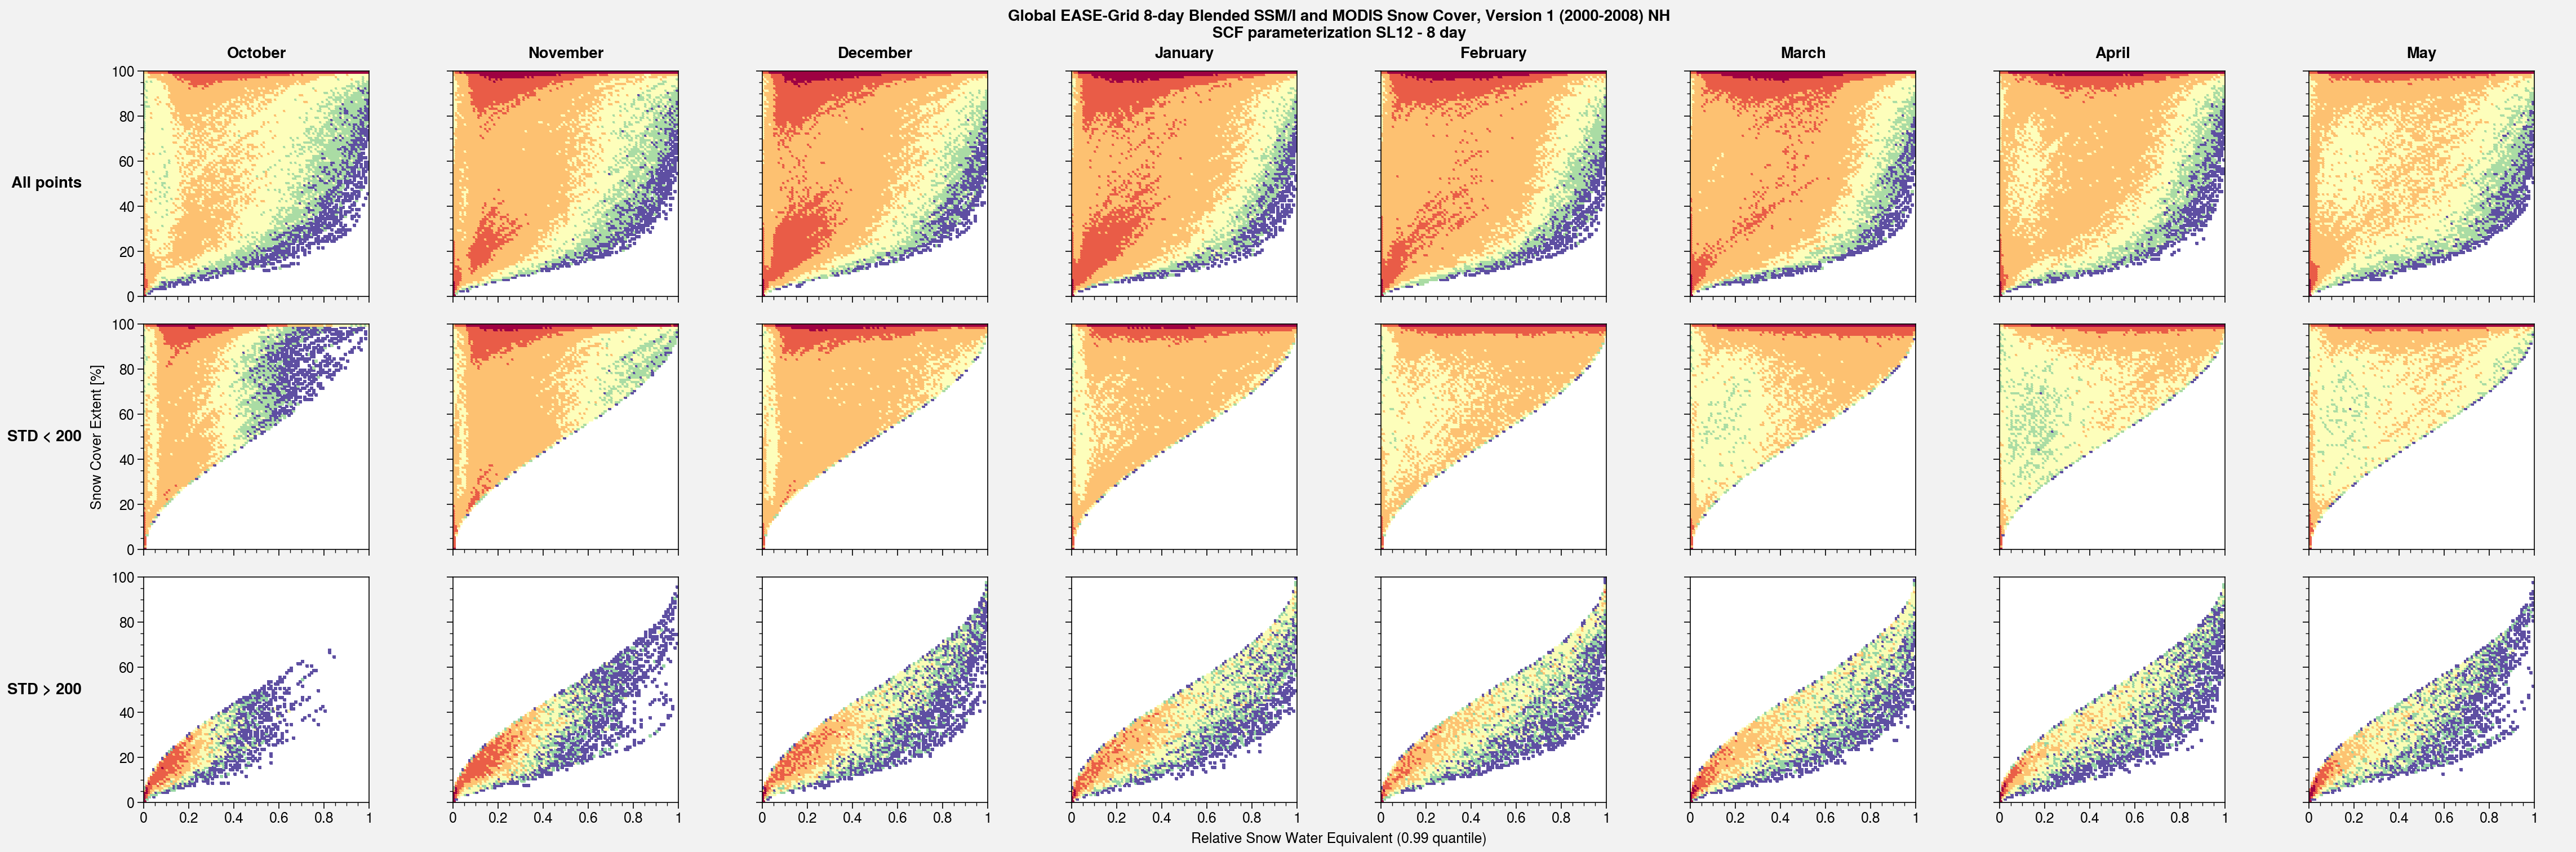

In [158]:
import calendar
months = np.array([10, 11, 12, 1, 2, 3, 4, 5])

lim_std = 200
SWE_max = 1 # relative

xylim = [[0, SWE_max], [0, 100]]
bins = 100
cmap = 'Spectral_r'
norm = 'log'
vmin=1
cmin=1

SWE = plot.arange(0, SWE_max, 0.01)

for param in ['SL12']:
    for domain in ['NH']:
        latlim, lonlim = u.get_zone(domain)

        # Figure
        fig, axs = plot.subplots(nrows=3, ncols=months.size, axwidth=2)

        k = 0

        # All points
        for i, month in enumerate(months):
            swe_raw = swe_regrid.sel(lat=latlim, lon=lonlim).where(swe_regrid['time.month'] == month, drop=True)
            swe_max = swe_raw.quantile(0.99)

            swe_relative = swe_raw / swe_max

            axs[k].hist2d(
                swe_relative.values.flatten(), 
                u.scf(param=param, SWE=swe_relative.values.flatten(), sigma_topo=std.where(swe_relative >= 0).values.flatten(), SWE_max=1), 
                bins=bins, range=xylim, cmap=cmap, norm=norm, vmin=vmin, cmin=cmin
            )
            k += 1

        # STD < 200
        for i, month in enumerate(months):
            swe_raw = swe_regrid.sel(lat=latlim, lon=lonlim).where((swe_regrid['time.month'] == month) & (std < lim_std), drop=True)
            swe_relative = swe_raw / swe_max

            axs[k].hist2d(
                swe_relative.values.flatten(), 
                u.scf(param=param, SWE=swe_relative.values.flatten(), sigma_topo=std.where(swe_relative >= 0).values.flatten(), SWE_max=1), 
                bins=bins, range=xylim, cmap=cmap, norm=norm, vmin=vmin, cmin=cmin
            )
            k += 1
        # STD > 200
        for i, month in enumerate(months):
            swe_raw = swe_regrid.sel(lat=latlim, lon=lonlim).where((swe_regrid['time.month'] == month) & (std > lim_std), drop=True)
            swe_relative = swe_raw / swe_max

            axs[k].hist2d(
                swe_relative.values.flatten(), 
                u.scf(param=param, SWE=swe_relative.values.flatten(), sigma_topo=std.where(swe_relative >= 0).values.flatten(), SWE_max=1), 
                bins=bins, range=xylim, cmap=cmap, norm=norm, vmin=vmin, cmin=cmin
            )
            k += 1

        axs.format(
            collabels=[calendar.month_name[month] for month in months],
            rowlabels=['All points', 'STD < '+str(lim_std), 'STD > '+str(lim_std)],
            xlabel='Relative Snow Water Equivalent (0.99 quantile)',
            ylabel='Snow Cover Extent [%]',
            suptitle='Global EASE-Grid 8-day Blended SSM/I and MODIS Snow Cover, Version 1 ' \
                     '('+str(ds.time['time.year'][0].values)+'-'+str(ds.time['time.year'][-1].values)+') ' + domain + '\n' \
                     'SCF parameterization '+param+' - 8 day'
        )


    #     filename = 'EASE-Grid_SCF-SWE_relative_Oct-May_'+domain
    #     for ext in ['jpg', 'png', 'pdf']:
    #         fig.save('img/'+filename+'.'+ext)

## Accumulation curve

In [9]:
# 100 snowfall events of 3 mm water equivalent
n_snowfall = 100
# snow_falls = np.array([3]*n_snowfall)
snow_falls = np.array([1]*n_snowfall)


In [5]:
def s(k, w):
    """
        Fraction of a pixel that is snow covered after a single precipitation event.

        Parameters
        ----------
        k : float
            Scale factor.
        w : float
            Snow Water Equivalent [kg/m2].

        Returns
        -------
        s : float
            Fraction of a pixel that is snow covered after a single precipitation event.

        Example
        -------
        >>> SCF = s(0.1, 3)
    """
    
    return np.min([1, k*w])

Text(0.5, 1.0, '$SCF_{N+1} = 1 - (1 - s_{N+1})(1-SCF_N)$\nwhere $ s = min(1, k \\cdot SWE) $ (k is a scale factor set to 0.1)')

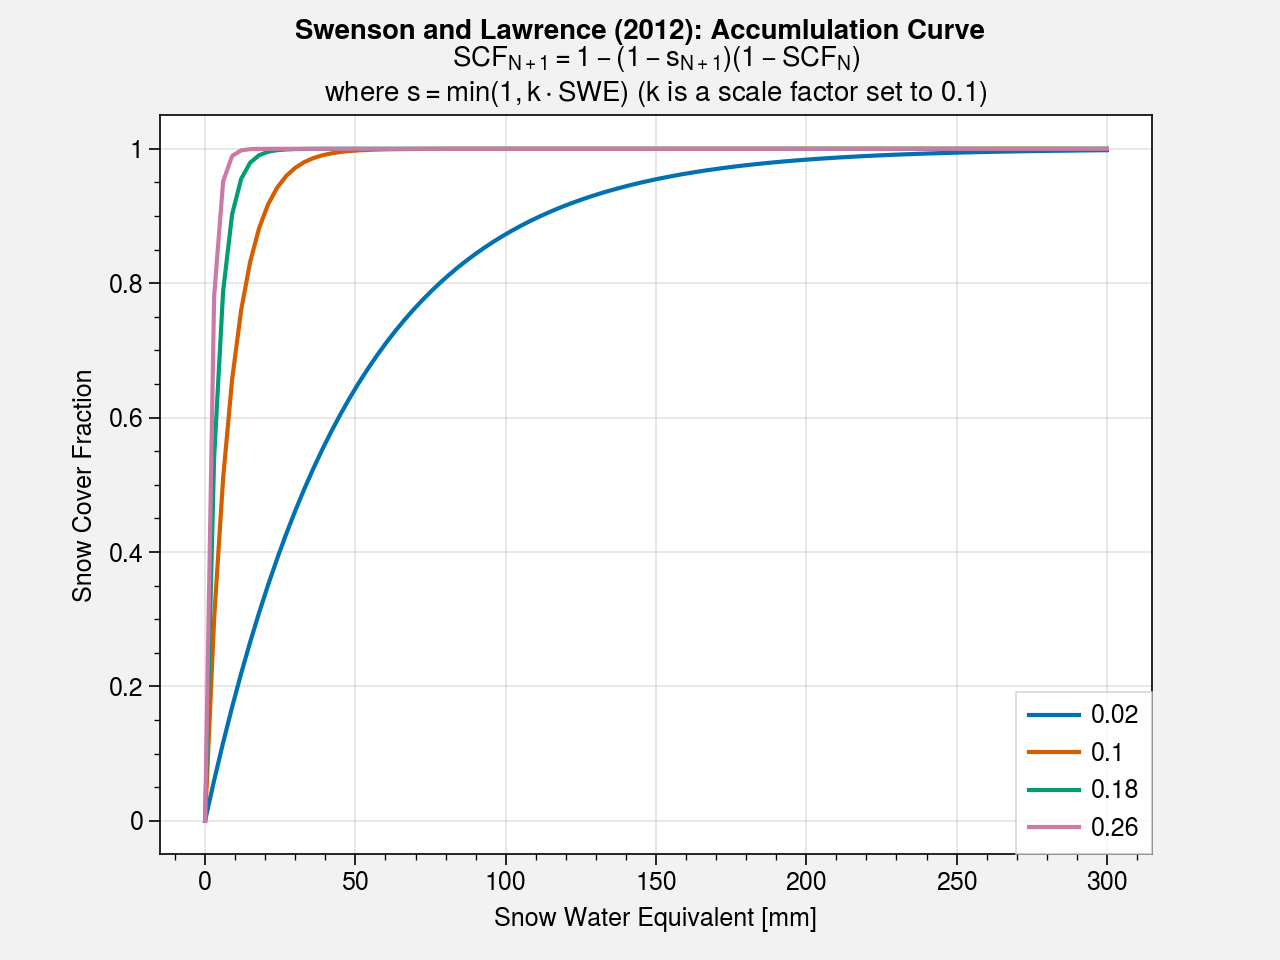

In [36]:
SCF = [None]*(n_snowfall+1)
SWE = [None]*(n_snowfall+1)

SCF[0] = 0 # Initial Snow Cover Fraction
SWE[0] = 0 # Initial Snow Water Equivalent

list_k = [0.02, 0.1, 0.18, 0.26] # Scale factor

for k in list_k:
    for n, snow_fall in enumerate(snow_falls):
        SCF[n+1] = 1 - (1 - s(k, snow_fall)) * (1 - SCF[n])
        SWE[n+1] = SWE[n] + snow_fall

    plt.plot(SWE, SCF, label=k)

plt.legend()
plt.xlabel('Snow Water Equivalent [mm]')
plt.ylabel('Snow Cover Fraction')
plt.suptitle('Swenson and Lawrence (2012): Accumlulation Curve')
plt.title('''$SCF_{N+1} = 1 - (1 - s_{N+1})(1-SCF_N)$
where $ s = min(1, k \cdot SWE) $ (k is a scale factor set to 0.1)''')

Text(0.5, 1.0, '$SCF_{N+1} = 1 - (1 - s_{N+1})(1-SCF_N)$\nwhere $ s = min(1, k \\cdot SWE) $ (k is a scale factor set to 0.1)')

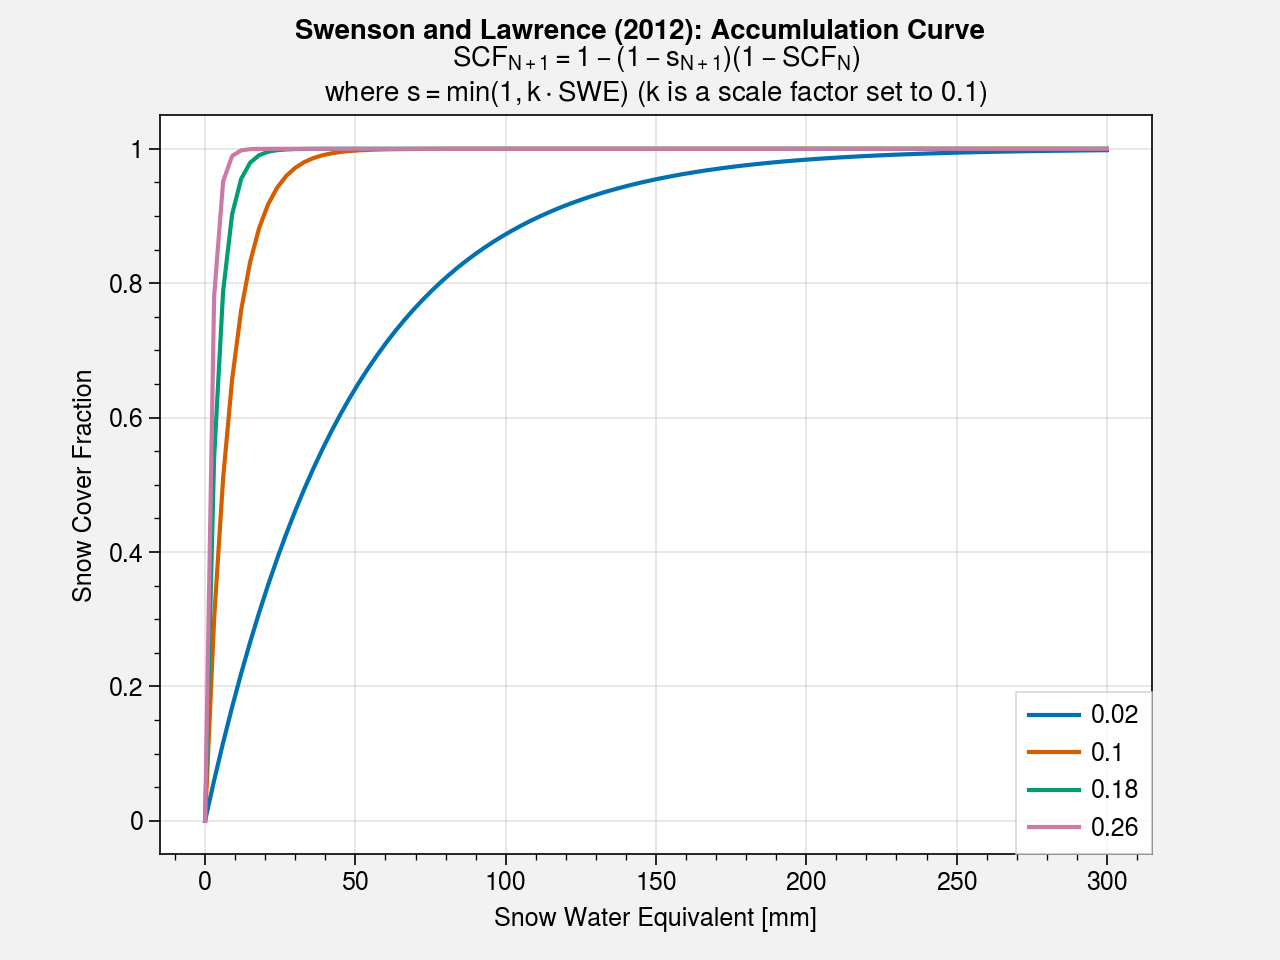

In [36]:
SCF = [None]*(n_snowfall+1)
SWE = [None]*(n_snowfall+1)

SCF[0] = 0 # Initial Snow Cover Fraction
SWE[0] = 0 # Initial Snow Water Equivalent

list_k = [0.02, 0.1, 0.18, 0.26] # Scale factor

for k in list_k:
    for n, snow_fall in enumerate(snow_falls):
        SCF[n+1] = 1 - (1 - s(k, snow_fall)) * (1 - SCF[n])
        SWE[n+1] = SWE[n] + snow_fall

    plt.plot(SWE, SCF, label=k)

plt.legend()
plt.xlabel('Snow Water Equivalent [mm]')
plt.ylabel('Snow Cover Fraction')
plt.suptitle('Swenson and Lawrence (2012): Accumlulation Curve')
plt.title('''$SCF_{N+1} = 1 - (1 - s_{N+1})(1-SCF_N)$
where $ s = min(1, k \cdot SWE) $ (k is a scale factor set to 0.1)''')

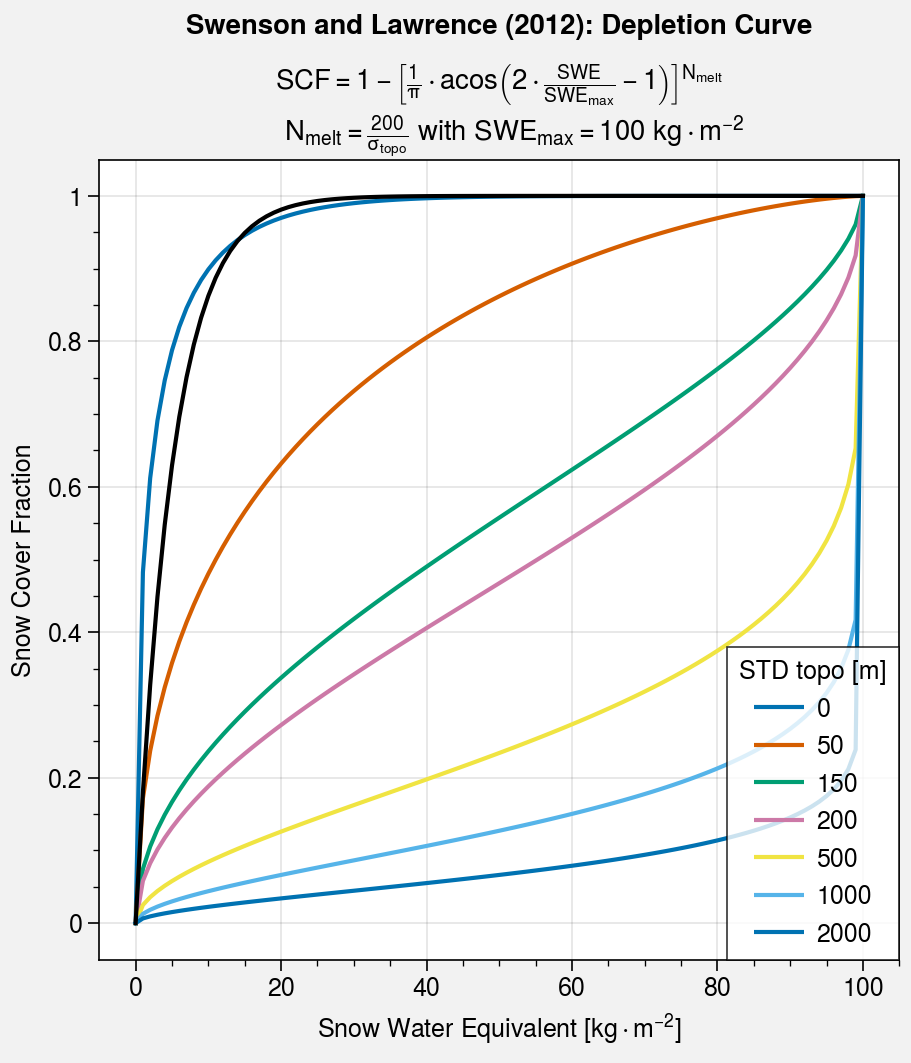

In [42]:
fig, axs = plot.subplots(nrows=1, ncols=1, axwidth=4)


###################
# Depletion curve #
###################
SWE_max = 100
# epsilon = 1e-6
# N_melt = 200 / (sigma_topo + epsilon)

# swe_max = ( 2. * 100 ) / ( 1. + np.cos( np.pi * (1. - 1)**(1./N_melt(:)) ) + eps ) 

SWE = plot.arange(0, SWE_max, 1)
param = 'SL12'

k=0
hs = []
for sigma_topo in [0, 50, 150, 200, 500, 1000, 2000]:
    x = SWE
    y = u.scf(param=param, SWE=SWE, sigma_topo=sigma_topo, SWE_max=SWE_max)
    h = axs[k].plot(x, y, label=sigma_topo)
    hs.append(h)
axs[k].legend(hs, label='STD topo [m]', ncols=1, loc='lr')

##################
# Snowfall curve #
##################
SCF = [None]*(n_snowfall+1)
SWE = [None]*(n_snowfall+1)

SCF[0] = 0 # Initial Snow Cover Fraction
SWE[0] = 0 # Initial Snow Water Equivalent

# list_k = [0.02, 0.1, 0.18, 0.26] # Scale factor
k = 0.18 # Scale factor

for n, snow_fall in enumerate(snow_falls):
    SCF[n+1] = 1 - (1 - s(k, snow_fall)) * (1 - SCF[n])
    SWE[n+1] = SWE[n] + snow_fall

plt.plot(SWE, SCF, color='k')

####################

axs.format(
    suptitle='Swenson and Lawrence (2012): Depletion Curve',
    title=
    r'''$ SCF = 1 - \left[\frac{1}{\pi} \cdot \operatorname{acos} \left(2 \cdot \frac{SWE}{SWE_{\max }} - 1\right)\right]^{N_{melt}}$
    $ N_{melt} = \frac{200}{\sigma_{topo}}$ with $SWE_{max} = $''' + str(SWE_max) + ' $kg \cdot m^{-2}$',
    xlabel='Snow Water Equivalent [$kg \cdot m^{-2}$]',
    ylabel='Snow Cover Fraction'
)